In [5]:
file_name = "Global_annual_mean_temp.csv"

In [6]:
import pandas as pd
temperature = pd.read_csv(file_name)

In [7]:
temperature.shape

(142, 3)

In [8]:
temperature.isnull().sum()

Year            0
No_Smoothing    0
Lowess(5)       0
dtype: int64

In [9]:
temperature.describe()

,Year,No_Smoothing,Lowess(5)
count,142.000000,142.000000,142.000000
mean,1950.500000,0.053944,0.054014
std,41.135953,0.362540,0.350972
min,1880.000000,-0.480000,-0.410000
25%,1915.250000,-0.200000,-0.227500
50%,1950.500000,-0.065000,-0.040000
75%,1985.750000,0.252500,0.235000
max,2021.000000,1.020000,0.940000


In [10]:
temperature.head(2)

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13


<AxesSubplot:xlabel='Year', ylabel='No_Smoothing'>

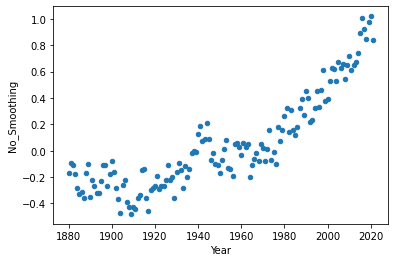

In [11]:
temperature.plot.scatter('Year', 'No_Smoothing')

<AxesSubplot:xlabel='Year', ylabel='Lowess(5)'>

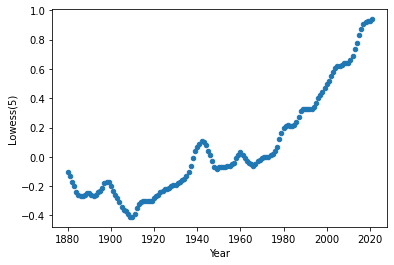

In [12]:
temperature.plot.scatter('Year', 'Lowess(5)')

In [13]:
# Upward moving trend 
# Data is in celcius

In [14]:
# Goal of this notebook is to forecast the gloabal annual mean temerature for year 2021 and year 2022 till 2030.

# I can take data till 2000 as training data and test on the rest.

In [15]:
# Forecasting=================================================================================================================

In [16]:
# Referring: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [17]:
# 1. Autoregression: ------------------------------------------------------------------------------------------
#Predict the next step in time series as a linear combination of the prior steps.
# y(t) = m*y(t-1) + c, this is denoted as AR(1) a it uses only one step prior value to predict.
# y(t) = m1*y(t-1) + m2*y(t-2) + c, this is denoted as AR(2) as it uses only 2 steps prior values to predict.
# .... and so on

In [18]:
!pip install statsmodels

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [19]:
# AR example
# statsmodels.tsa contains time series analysis statistics models
from statsmodels.tsa.ar_model import AutoReg
from random import random

# fit model
train_data = temperature.loc[:temperature.shape[0]-10,'Lowess(5)']
test_data = temperature.loc[temperature.shape[0]-10:,'Lowess(5)']
model = AutoReg(train_data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(train_data), len(train_data) + len(test_data)-1)
#print(yhat)

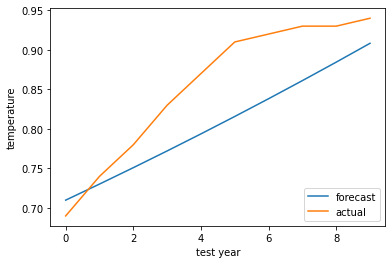

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(10), yhat)
plt.plot(range(10), test_data)
plt.xlabel("test year")
plt.ylabel("temperature")
plt.legend(["forecast", "actual"], loc="lower right")
plt.show()

In [21]:
# Implement Autoregression in excel : 
# https://www.bing.com/videos/search?q=perform+autoregression+model+in+excel&view=detail&mid=3AB21B7C9DD933C6513D3AB21B7C9DD933C6513D&FORM=VIRE

In [22]:
# 2. Moving Average

In [23]:
# 3. ARMA 
# The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function 
# of the observations and residual errors at prior time steps.

In [24]:
from statsmodels.tsa.arima.model import ARIMA


In [35]:
#order tuple, optional
#The (p,d,q) order of the model for the autoregressive, differences, and moving average components. 
# ARMA example

model = ARIMA(train_data, order=(2, 0, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(train_data), len(train_data) + len(test_data)-1)
print(yhat)

133    0.704641
134    0.696639
135    0.680804
136    0.664808
137    0.649237
138    0.634123
139    0.619455
140    0.605221
141    0.591409
142    0.578004
Name: predicted_mean, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


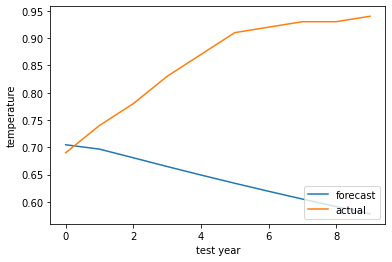

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(10), yhat)
plt.plot(range(10), test_data)
plt.xlabel("test year")
plt.ylabel("temperature")
plt.legend(["forecast", "actual"], loc="lower right")
plt.show()

In [ ]:
# ARIMA

# The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence 
# as a linear function of the differenced observations and residual errors at prior time steps.

#It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing 
# pre-processing step of the sequence to make the sequence stationary, called integration (I).

#The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models
# as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

In [39]:
# ARIMA example

# fit model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(train_data), len(train_data) + len(test_data)-1, typ='levels')
print(yhat)

133    0.715223
134    0.734495
135    0.749220
136    0.760470
137    0.769065
138    0.775633
139    0.780651
140    0.784484
141    0.787414
142    0.789652
Name: predicted_mean, dtype: float64


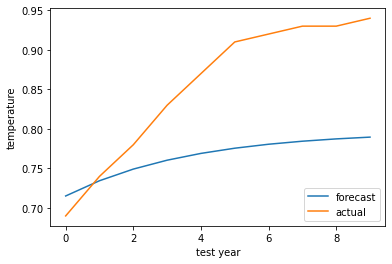

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(10), yhat)
plt.plot(range(10), test_data)
plt.xlabel("test year")
plt.ylabel("temperature")
plt.legend(["forecast", "actual"], loc="lower right")
plt.show()

In [ ]:
# Seasonal Autoregressive Integrated Moving Average
#(SARIMA) method models the next step in the sequence as a linear function 
# of the differenced observations, errors, differenced seasonal observations, 
# and seasonal errors at prior time steps.

#It combines the ARIMA model with the ability to perform the same autoregression, 
# differencing, and moving average modeling at the seasonal level.

#The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters 
# to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. 
# SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

#The method is suitable for univariate time series with trend and/or seasonal components.


In [41]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset

# fit model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(train_data), len(train_data) + len(test_data)-1)
print(yhat)

133    0.715223
134    0.734495
135    0.749220
136    0.760470
137    0.769065
138    0.775633
139    0.780651
140    0.784484
141    0.787414
142    0.789652
Name: predicted_mean, dtype: float64


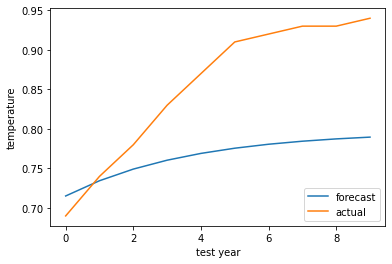

In [42]:
import matplotlib.pyplot as plt
plt.plot(range(10), yhat)
plt.plot(range(10), test_data)
plt.xlabel("test year")
plt.ylabel("temperature")
plt.legend(["forecast", "actual"], loc="lower right")
plt.show()

###### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
he Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) 
is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary 
endogenous sequence (e.g. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

In [49]:
len(train_data) + len(test_data)-1

142

In [50]:
# SARIMAX example

# exogenous data

data2 = [x + random() for x in range(101, 101+train_data.shape[0])]

# fit model
model = SARIMAX(train_data, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
exog2 = [x + random() for x in range(200, 200+test_data.shape[0])]
yhat = model_fit.predict(len(train_data), len(train_data) + len(test_data)-1, exog=[exog2])
print(yhat)

133    0.605646
134    0.627237
135    0.645140
136    0.658576
137    0.671272
138    0.681540
139    0.690124
140    0.696262
141    0.701587
142    0.708635
Name: predicted_mean, dtype: float64


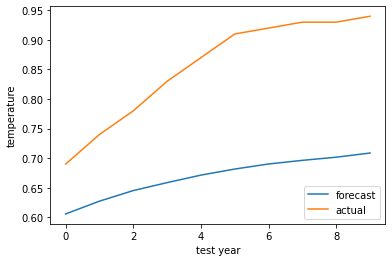

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(10), yhat)
plt.plot(range(10), test_data)
plt.xlabel("test year")
plt.ylabel("temperature")
plt.legend(["forecast", "actual"], loc="lower right")
plt.show()

### Vector Autoregression (VAR)
The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

The method is suitable for multivariate time series without trend and seasonal components.

A Multivariate Time Series consist of more than one time-dependent variable and each variable depends not only on its past values but also has some dependency on other variables.

To deal with MTS, one of the most popular methods is Vector Auto Regressive Moving Average models (VARMA) that is a vector form of autoregressive integrated moving average (ARIMA) that can be used to examine the relationships among several variables in multivariate time series analysis.

In hana-ml, the function of VARMA is called VectorARIMA which supports a series of models, e.g. pure VAR, pure VMA, VARX(VAR with exogenous variables), sVARMA (seasonal VARMA), VARMAX. Similar to ARIMA, building a VectorARIMA also need to select the propriate order of Auto Regressive(AR) p, order of Moving Average(MA) q, degree of differencing d. If the seasonality exists in the time series, seasonal related parameters are also needs to be decided, i.e. seasonal period s, Order of vector seasonal AR P, order of vector seasonal MA Q, Degree of seasonal differencing D.

In [93]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[[0.4650373  1.04115913]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


### Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

In [95]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.0383201]


### Holt Winter’s Exponential Smoothing (HWES)
The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

In [96]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.20370252]
